# Flight price prediction model

## Instruction:

    1. You will have a dataset.
    2. Find the cheapest and expenses flight at a same time.
    3. You have to go through EDA.
    4. ML model
    5. find a sweer spot for each ticket.

## What are you to do?
Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his
brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to
Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait
instead of buy now, simply because ticket prices are just too high.\
Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a
sweet-spot Ahmed is hoping to find and maybe he just might find it.\
This is the problem that you will be tackling in this competition. Can you predict future prices
accurately to such a degree that you can now tell Ahmed - with confidence - that he has made
the wrong decision.\
Your task boils down to generating optimal predictions for flight prices of multiple airlines. If
successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating
algorithms.

# Exploratory Data Analysis

### We will extract information from our data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load your data

# X_train = pd.read_csv("Xtrain.csv")
# y_train = pd.read_csv("ytrain.csv")
# X_test = pd.read_csv("Xtest.csv")

In [3]:
# shape

# X_tarin.shape
# y_train.shape

In [4]:
# merge two datasets into make one

# df = pd.concat([X_train,y_train],axis = 1) # here's 1 is concatination through columns

# df.sample(15)

In [5]:
# saving a csv file for training dataset

# df.to_csv("sastaticket_train.csv")

# saving testing file data in to csv

# x_test.sample(250).to_csv("sastaticket_test.csv")

In [6]:
df_test = pd.read_csv(r'H:\DAta Science\Machine Learning ka chilla\ML related data\machinelearning_ka_chilla-master\Sastaticket_datasets\sastaticket_test.csv')
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [7]:
df_train = pd.read_csv(r'H:\DAta Science\Machine Learning ka chilla\ML related data\machinelearning_ka_chilla-master\Sastaticket_datasets\sastaticket_train.csv')
df_train.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   Unnamed: 0.1  5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.2  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [9]:
df_train.describe()

,Unnamed: 0,Unnamed: 0.1,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [10]:
print(df_train.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.2', 'target'],
      dtype='object')


## Finding unique values in categories list

In [11]:
df_train['f2'].unique()

array(['x'], dtype=object)

In [12]:
cat_list = df_train[['f2','f3','f6','f8','f9','f10']]

# unique value in each column

for i in cat_list:
    print(df_train[i].unique())
    print("---------------------------------------------------------") # this is separator line

['x']
---------------------------------------------------------
['y']
---------------------------------------------------------
['gamma' 'alpha' 'beta' 'omega']
---------------------------------------------------------
[ 0. 35. 20. 15. 32. 40. 45.]
---------------------------------------------------------
[0 1 2]
---------------------------------------------------------
['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
---------------------------------------------------------


In [13]:
df_train.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2","f2",'f3','f10'], axis=1, inplace=True)

In [14]:
df_train.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 278.4+ KB


### Convert into dataetime objects

In [16]:
from datetime import date,time

df_train["f1"] = pd.to_datetime(df_train["f1"])
df_train["f4"] = pd.to_datetime(df_train["f4"])
df_train["f5"] = pd.to_datetime(df_train["f5"])

In [17]:
# here the columns converted in to date time

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


### Adding column after Substraction

In [18]:
df_train.insert(0,"time_to_dep(s)",((df_train['f4'] - df_train["f1"]).astype("timedelta64[s]")),True)
df_train.insert(1,"travel_time(s)",((df_train['f5'] - df_train["f4"]).astype("timedelta64[s]")),True)

In [19]:
df_train.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [20]:
df_train.isnull().sum()

time_to_dep(s)    0
travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
target            0
dtype: int64

##### Rename the coluumns

In [21]:
# df_train = df_train.rename({"f12":"f1"})

## here i can "separate" continous and ctegoric columns

In [22]:
cat_cols = ["f6","f7",'f8',"f9"]
num_cols = ["time_to_dep(s)","travel_time(s)"]

## Plotting

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\download\Anaconda\lib\site-packages\seab

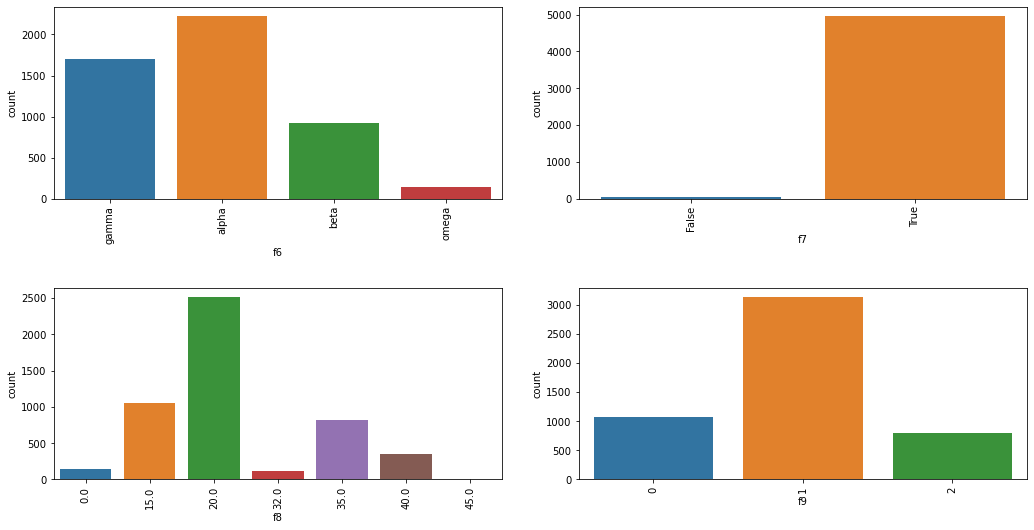

In [23]:
# Plotting Categorical columns

c = 1
plt.figure(figsize=(15,8))

for i in cat_cols:
    plt.subplot(2,2,c)
    sns.countplot(df_train[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c = c+1
plt.show()

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


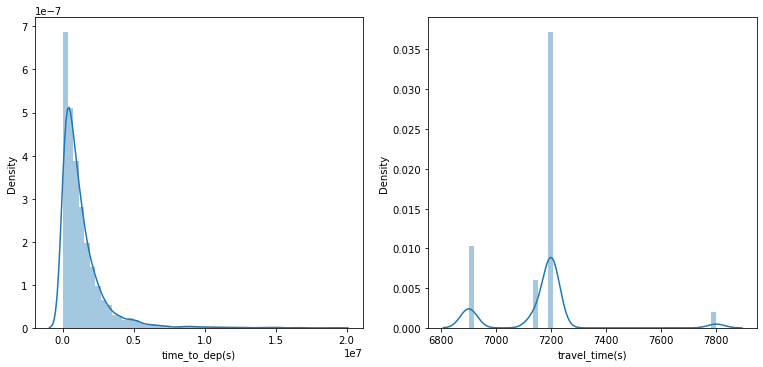

In [24]:
# Plotting Continous/Numerical columns

c = 1
plt.figure(figsize=(20,40))

for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df_train[i])
    c = c+1
plt.show()

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='Density'>

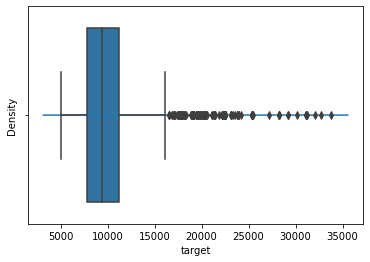

In [25]:
sns.distplot(df_train["target"])
sns.boxplot(df_train["target"])

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

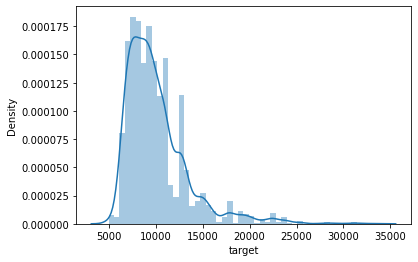

In [26]:
# target

sns.distplot(df_train["target"])

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

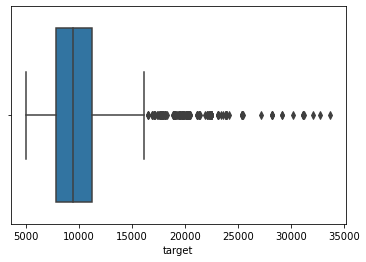

In [27]:
sns.boxplot(df_train["target"])

# Outlier Removal          Task

## Skew and Kurtosis

In [28]:
df_train.skew()

C:\Users\eAgLe\AppData\Local\Temp/ipykernel_8596/1035533876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew()


time_to_dep(s)     3.703644
travel_time(s)     1.319374
f7               -11.660949
f8                 0.418300
f9                 0.027547
target             2.056345
dtype: float64

In [29]:
df_train.kurtosis()

C:\Users\eAgLe\AppData\Local\Temp/ipykernel_8596/3332348123.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.kurtosis()


time_to_dep(s)     20.796049
travel_time(s)      5.504109
f7                134.031335
f8                  0.046374
f9                 -0.310364
target              6.344666
dtype: float64

In [30]:
print(df_train.skew())
print("---------------------------------")
print(df_train.kurtosis())

time_to_dep(s)     3.703644
travel_time(s)     1.319374
f7               -11.660949
f8                 0.418300
f9                 0.027547
target             2.056345
dtype: float64
---------------------------------
time_to_dep(s)     20.796049
travel_time(s)      5.504109
f7                134.031335
f8                  0.046374
f9                 -0.310364
target              6.344666
dtype: float64


C:\Users\eAgLe\AppData\Local\Temp/ipykernel_8596/752440424.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.skew())
C:\Users\eAgLe\AppData\Local\Temp/ipykernel_8596/752440424.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.kurtosis())


# encoding of variable

In [31]:
df_train.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [32]:
df_train.drop(["f1",'f4','f5'], axis = 1, inplace = True)

In [33]:
df_train.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,6500.0


# Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [35]:
df_train["f8"].unique()

array([ 0., 35., 20., 15., 32., 40., 45.])

In [36]:
df_train["f9"].unique()

array([0, 1, 2], dtype=int64)

In [37]:
# apply label encoder

df_train["f6"] = le.fit_transform(df_train["f6"])
df_train["f7"] = le.fit_transform(df_train["f7"])
df_train["f8"] = le.fit_transform(df_train["f8"])

In [38]:
df_train.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,2,1,0,0,7400.0
1,29688.0,7200.0,0,1,4,1,15377.0
2,3033072.0,7200.0,2,1,2,1,6900.0
3,363011.0,7200.0,0,1,1,1,9707.0
4,2142368.0,6900.0,1,1,2,0,6500.0


In [39]:
df_train.sample(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
487,703051.0,7200.0,2,1,2,1,12560.0
1497,4705503.0,7200.0,3,1,2,1,6870.0
3940,959687.0,7200.0,0,1,1,1,9045.0
398,668669.0,7200.0,0,1,1,1,6531.0
907,60881.0,7200.0,0,1,1,1,6850.0
3134,403306.0,7200.0,2,1,2,1,12050.0
3770,22813.0,7200.0,0,1,1,1,7520.0
2394,276135.0,7200.0,0,1,4,1,7900.0
3448,4331963.0,7140.0,2,1,2,1,12560.0
201,1376357.0,7200.0,0,1,1,1,7520.0


In [40]:
df_train.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,33720.000000


# Skleran function to scale our data/ Normalize

In [41]:
# from sklearn.preprocessing import StandardScalar

# sc = StandardScalar()
# df_train["time_to_dep(s)"] = sc.fit_transform(df_train["time_to_dep(s)"])
# df_train["travel_time(s)"] = sc.fit_transform(df_train["travel_time(s)"])
# df_train["target"] = sc.fit_transform(df_train["target"])

In [42]:
df_train.columns

Index(['time_to_dep(s)', 'travel_time(s)', 'f6', 'f7', 'f8', 'f9', 'target'], dtype='object')

## Splitting our data into X and y

In [43]:
X = df_train[['time_to_dep(s)', 'travel_time(s)', 'f6', 'f7', 'f8', 'f9']]
y = df_train[["target"]]

In [44]:
X.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
0,1268192.0,7200.0,2,1,0,0
1,29688.0,7200.0,0,1,4,1
2,3033072.0,7200.0,2,1,2,1
3,363011.0,7200.0,0,1,1,1
4,2142368.0,6900.0,1,1,2,0


In [45]:
y.head()

,target
0,7400.0
1,15377.0
2,6900.0
3,9707.0
4,6500.0


# ML Modeling

#### Regression Pipeline and algos

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:
# root mean square error

# rms = mean_absolute_error(y_test, y_pred, squared=False)

In [48]:
# Shoten the name

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [49]:
# model loop

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

for i in [lr,dt,svr,knn]:                   # read all models
    i.fit(X_train,y_train)                  # Fitting our models
    pred = i.predict(X_test)                # Predict
    test_score = r2_score(y_test,pred)      #test score
    train_score = r2_score(y_train,i.predict(X_train))    #train score
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("R2 Score is = ",r2_score(y_test,pred))
        print("mean_absolute_error is = ",mean_absolute_error(y_test,pred))
        print("mean_squared_error is = ",mean_squared_error(y_test,pred))
        print("RMSE is = ",mean_squared_error(y_test , pred, squared = False))
        print("-----------------------------------------------------------------------")

LinearRegression()
R2 Score is =  0.08245769682272552
mean_absolute_error is =  2175.6552919422875
mean_squared_error is =  9604880.48361756
RMSE is =  3099.174161549744
-----------------------------------------------------------------------


H:\download\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()
R2 Score is =  -0.06121290745272212
mean_absolute_error is =  2234.394635530172
mean_squared_error is =  11108831.830924733
RMSE is =  3332.991423770054
-----------------------------------------------------------------------


In [50]:
#here i can split data by 70/30
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

for i in [lr,dt,svr,knn]:                   # read all models
    i.fit(X_train,y_train)                  # Fitting our models
    pred = i.predict(X_test)                # Predict
    test_score = r2_score(y_test,pred)      #test score
    train_score = r2_score(y_train,i.predict(X_train))    #train score
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("R2 Score is = ",r2_score(y_test,pred))
        print("mean_absolute_error is = ",mean_absolute_error(y_test,pred))
        print("mean_squared_error is = ",mean_squared_error(y_test,pred))
        print("RMSE is = ",mean_squared_error(y_test , pred, squared = False))
        print("-----------------------------------------------------------------------")

LinearRegression()
R2 Score is =  0.09822271834361607
mean_absolute_error is =  2205.5586715455734
mean_squared_error is =  10163929.820282144
RMSE is =  3188.0918776412555
-----------------------------------------------------------------------


H:\download\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()
R2 Score is =  -0.06361271052849027
mean_absolute_error is =  2285.529993580401
mean_squared_error is =  11987976.594303807
RMSE is =  3462.365751087514
-----------------------------------------------------------------------


# Final data Prediction

In [51]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [52]:
lr.predict(df_test)

ValueError: could not convert string to float: '2021-09-16 12:20:01.578279+00:00'

# Note:
    heres show that we can tranform the test data and select the importnat feature where i can train the model

In [53]:
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [54]:
df_test.drop(["Unnamed: 0","f2",'f3','f10'], axis=1, inplace=True)

In [55]:
df_test.head()

,f1,f4,f5,f6,f7,f8,f9
0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


#### Converting the columns in to datetime

In [56]:
from datetime import date,time

df_test["f1"] = pd.to_datetime(df_test["f1"])
df_test["f4"] = pd.to_datetime(df_test["f4"])
df_test["f5"] = pd.to_datetime(df_test["f5"])

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      250 non-null    datetime64[ns, UTC]
 1   f4      250 non-null    datetime64[ns, UTC]
 2   f5      250 non-null    datetime64[ns, UTC]
 3   f6      250 non-null    object             
 4   f7      250 non-null    bool               
 5   f8      250 non-null    float64            
 6   f9      250 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 12.1+ KB


In [58]:
df_test.insert(0,"time_to_dep(s)",((df_test['f4'] - df_test["f1"]).astype("timedelta64[s]")),True)
df_test.insert(1,"travel_time(s)",((df_test['f5'] - df_test["f4"]).astype("timedelta64[s]")),True)

In [59]:
df_test.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,1441198.0,7200.0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,420706.0,7200.0,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,4043178.0,7200.0,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,465652.0,6900.0,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,1469499.0,7200.0,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


In [60]:
df_test.drop(["f1",'f4','f5'], axis = 1, inplace = True)

In [61]:
df_test.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
0,1441198.0,7200.0,omega,True,20.0,1
1,420706.0,7200.0,omega,True,20.0,1
2,4043178.0,7200.0,alpha,True,20.0,1
3,465652.0,6900.0,beta,True,40.0,0
4,1469499.0,7200.0,alpha,True,20.0,1


In [62]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le1

LabelEncoder()

In [63]:
df_test["f8"].unique()

array([20., 40., 15.])

In [64]:
df_test["f8"].unique()

array([20., 40., 15.])

In [65]:
df_test["f9"].unique()

array([1, 0, 2], dtype=int64)

In [66]:
df_test["f6"] = le.fit_transform(df_test["f6"])
df_test["f7"] = le.fit_transform(df_test["f7"])
df_test["f8"] = le.fit_transform(df_test["f8"])

In [67]:
df_test.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
0,1441198.0,7200.0,3,0,1,1
1,420706.0,7200.0,3,0,1,1
2,4043178.0,7200.0,0,0,1,1
3,465652.0,6900.0,1,0,2,0
4,1469499.0,7200.0,0,0,1,1


# Here's the final predicted result of untrain test file

In [68]:
lr.predict(df_test)

array([[ 9858.66444144],
       [10163.59815744],
       [ 9177.05433143],
       [ 9660.03998812],
       [ 9946.09661815],
       [10192.05358172],
       [10221.05194467],
       [ 9693.52225485],
       [ 9540.32898855],
       [10187.14823681],
       [ 9108.57450895],
       [ 9648.21277006],
       [10111.11276788],
       [ 9442.82687284],
       [ 9810.79350666],
       [ 9420.31269756],
       [10033.03821992],
       [11036.17072024],
       [11214.42492365],
       [10188.69637397],
       [10759.23170823],
       [ 9491.35190378],
       [ 8511.68945647],
       [ 9201.39123625],
       [10237.26368472],
       [ 8950.69879589],
       [ 9755.64495602],
       [10378.44611579],
       [ 9782.73695448],
       [10223.3585385 ],
       [ 9418.8659727 ],
       [ 8083.32160863],
       [ 9644.72560517],
       [ 9698.53898419],
       [ 9313.03225733],
       [10172.19486339],
       [11349.95046751],
       [ 9981.22565891],
       [10094.38386252],
       [ 9650.77925337],
